Adapted from: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling

#0. Import libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


#1. Dataset Description

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Attribute Information:

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level.
1: Undergrad;
2: Graduate;
3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by


In [2]:
file_path = '/content/Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(file_path)

### Dataset Information

In [9]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Drop some irrelevant columns

ID ?

ZIP Code ?



In [13]:
#Add the exchange rate from Indian Rupees to USD
df.drop(columns=['ZIP Code','ID'],inplace=True)

In [14]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#3. Dataset Visualizations

### Visualize the price distribution

Text(0, 0.5, 'Frequency')

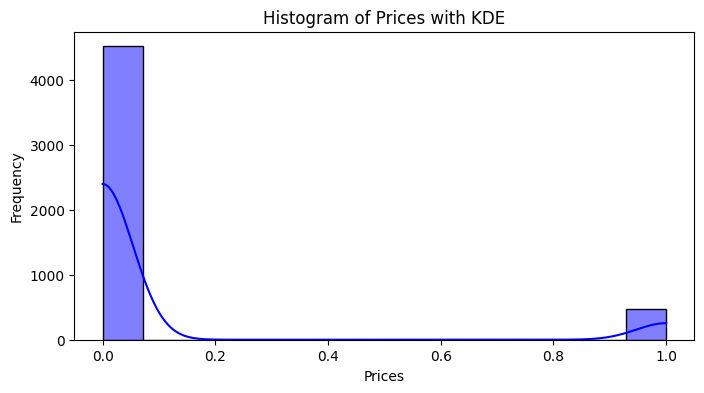

In [15]:
#Price Histogram
prices = df['Personal Loan']

# Create a histogram for the 'prices' variable
plt.figure(figsize=(8, 4))
sns.histplot(prices, color='blue', kde=True)  # Using seaborn for histogram and KDE
plt.title('Histogram of Prices with KDE')
plt.xlabel('Prices')
plt.ylabel('Frequency')

In [16]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


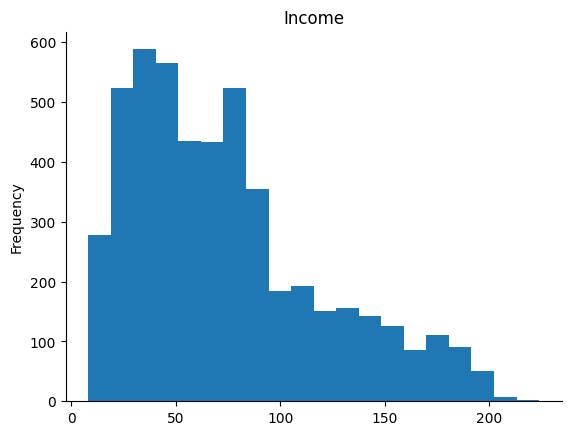

In [17]:
# @title Income

from matplotlib import pyplot as plt
df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

#4. Preprocessing & Feature Engineering

In [18]:
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'categorical variables: ', categorical_variables)

categorical variables:  []


In [19]:
categorical_variables = ['Education']

In [20]:
numerical_variables = [feature for feature in df.columns if df[feature].dtype != 'object']

print(f'numerical variables: ', numerical_variables)

numerical variables:  ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [21]:
# removing the output variable, we dont need to scale it.
numerical_variables.remove("Education")

In [22]:
numerical_variables.remove("Personal Loan")

In [28]:
binarized_inputs = ['Securities Account','CD Account','Online','CreditCard']



In [29]:
for item in binarized_inputs:
    numerical_variables.remove(item)

In [30]:
print(f'numerical variables: ', numerical_variables)

numerical variables:  ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']


## Encoding categorical variables

In [31]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc.fit(df[categorical_variables])
print(enc.categories_)



[array([1, 2, 3])]


In [32]:
encoded_categorical_inputs = enc.transform(df[categorical_variables])

In [33]:
encoded_categorical_inputs.shape

(5000, 3)

## Scaling numerical variables

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_variables])


StandardScaler()

In [35]:
numerical_variables

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

In [36]:

scaled_numerical_inputs = scaler.transform(df[numerical_variables])

In [37]:
scaled_numerical_inputs.shape

(5000, 6)

In [38]:
# check if the means are around 0
scaled_numerical_inputs.mean(axis=0)

array([-2.13162821e-18, -1.17950094e-16,  1.44950718e-16,  1.00186526e-16,
       -6.39488462e-17, -5.61328761e-17])

In [39]:
# check if the stds are around 1
scaled_numerical_inputs.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

## Joining the inputs

In [40]:
X = np.column_stack((encoded_categorical_inputs,scaled_numerical_inputs,df[binarized_inputs]))

In [41]:
# check the shape of the joined array
X.shape

(5000, 13)

In [43]:
y = df['Personal Loan']
y.shape

(5000,)

## Split the data set into training and test sets

In [44]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#5. Model Setup & Training

## Initial Logistic Regression Model

In [46]:
# initialize the model
lr = LogisticRegression()

In [48]:
# train the model
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
#rmse = np.sqrt(mse)

print(f"Accuracy: {acc}")

Accuracy: 0.966


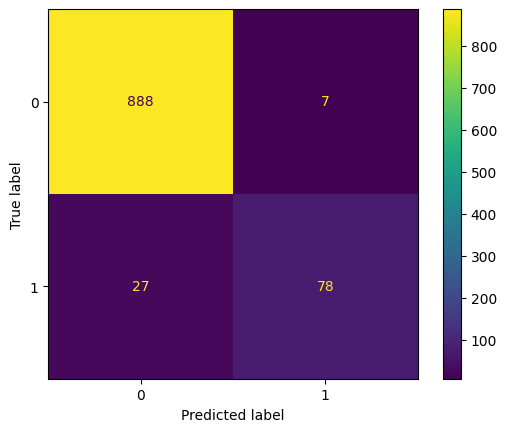

In [56]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

## What are the optimal parameters ?


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Visualize the coefficients

In [58]:
lr.coef_

array([[-2.29060898,  1.08407763,  1.20518139, -0.18658242,  0.30333706,
         2.52652015,  0.72932025,  0.24223889,  0.08838539, -0.60917974,
         3.26689155, -0.61683424, -0.95766619]])

<BarContainer object of 13 artists>

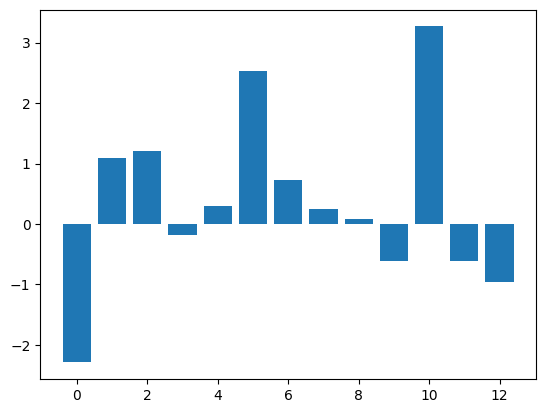

In [62]:
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

### Other Models

In [64]:


# Initialize Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
#r2_decision_tree = decision_tree_model.score(X_test, y_test)
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)


# Initialize Gradient Boosting Classifier model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
#r2_gradient_boosting = gradient_boosting_model.score(X_test, y_test)
acc_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)


# Initialize XGBoost Classifier model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
#r2_xgboost = xgboost_model.score(X_test, y_test)
acc_xgboost = accuracy_score(y_test, y_pred_xgboost)


In [67]:
model_names = ['Decision Tree', 'Gradient Boosting', 'XGBoost']

# List of models and their corresponding metrics
models = [

    { 'Acc': acc_decision_tree,},
    {'Acc': acc_gradient_boosting},
    {'Acc': acc_xgboost},
]

# Create a DataFrame
df_metrics = pd.DataFrame(models, index=model_names)

df_metrics

,Acc
Decision Tree,0.988
Gradient Boosting,0.992
XGBoost,0.992
